# 🧠 HealthAI Project: Predicting Life Expectancy Using Supervised Machine Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/ColabData/data.csv'  # Use your new clean file name
df = pd.read_csv(file_path)
print(df.head())  # This will show the first few rows of your CSV file


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  05/01/2020          0.0        0.0   
1      AFG      Asia  Afghanistan  06/01/2020          0.0        0.0   
2      AFG      Asia  Afghanistan  07/01/2020          0.0        0.0   
3      AFG      Asia  Afghanistan  08/01/2020          0.0        0.0   
4      AFG      Asia  Afghanistan  09/01/2020          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
# Check how many missing values per column
print(df.isnull().sum())


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [ ]:
print(df.columns.tolist())


['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [ ]:
df['high_new_cases'] = (df['new_cases'] > 1000).astype(int)


In [ ]:
features = ['new_cases', 'total_cases', 'total_deaths', 'reproduction_rate', 'icu_patients']
X = df[features].fillna(0)
y = df['high_new_cases']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9985213128878643
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82260
           1       0.98      0.98      0.98      3627

    accuracy                           1.00     85887
   macro avg       0.99      0.99      0.99     85887
weighted avg       1.00      1.00      1.00     85887



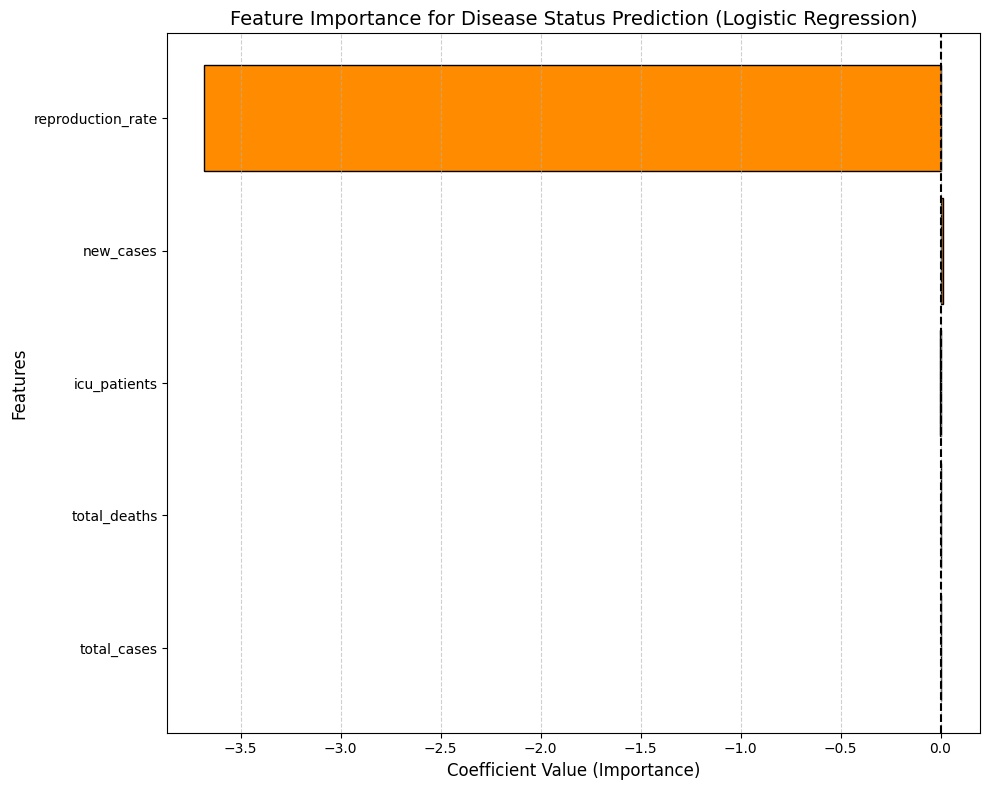

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make sure your model is trained, e.g., model = LogisticRegression().fit(X_train, y_train)

# Get feature importance from coefficients
importance = model.coef_[0]
features = X_train.columns
indices = np.argsort(abs(importance))  # Sort by absolute value

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for Disease Status Prediction (Logistic Regression)", fontsize=14)
plt.barh(range(len(indices)), importance[indices], align="center", color="darkorange", edgecolor="black")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Coefficient Value (Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
